## TODOs

* remove up until age 7 from dataset
* correct mislabeled or filenames that don't have labels?
* show_top_losses -> some labels don't register

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import fastai
from fastai.vision import *

from torchvision import models
from visualization.modules import LayeredModule, get_nested_layers
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import NetLens

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
# path = Path("/home/jupyter/fai-berlin-faces/cropped/")
#! rm "/home/jupyter/fai-berlin-faces/cropped/61_1_20170109142408075.jpg.chip.jpg"
#! rm "/home/jupyter/fai-berlin-faces/cropped/61_3_20170109150557335.jpg.chip.jpg"

path = Path("/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped")

for name in ('61_1_20170109142408075.jpg.chip.jpg', '61_3_20170109150557335.jpg.chip.jpg'):
    file = path / name
    if file.exists():
        print(f'Deleting {file}')
        file.unlink()

Deleting /Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/61_1_20170109142408075.jpg.chip.jpg
Deleting /Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/61_3_20170109150557335.jpg.chip.jpg


In [12]:
verify_images(path, recurse=True)


In [20]:
def get_age(path): return int(path.name.split("_")[0])
# [get_age(p) for p in sample]

In [22]:
def isFemale(path): return bool(int(path.name.split('_')[1]))

def get_gender(path):
   # print(path, "path here")
    return "female" if isFemale(path) else "male"

# [isFemale(p) for p in sample], [get_gender(p) for p in sample] #isFemale(sample[1]), get_gender(sample[1])

In [23]:
races = ["White", "Black", "Asian", "Indian", "Others"]

def get_race(path):
    return races[int(path.name.split("_")[2])]
# [get_race(p) for p in sample]

In [14]:
len([get_gender(p) for p in path.iterdir()])

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/9_1_2_20161219204347420.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_1_2_20161219154612988.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/16_0_0_20170104003740977.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_1_3_20161219230734016.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/26_1_1_20170103181931657.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/2_0_2_20161219141650121.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/53_1_0_20170110143534851.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/36_1_4_20170104172843788.jpg.chip.jpg path h

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/4_0_0_20170110211454141.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/11_0_0_20170110224408700.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/58_0_0_20170111171747496.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/32_1_0_20170104165842857.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/56_1_1_20170110153339650.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_1_4_20161221201846817.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/32_1_0_20170105162521931.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/37_0_0_20170104205214549.jpg.chip.jpg path

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/22_1_0_20170110173815028.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/29_1_1_20170105183913087.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/10_1_0_20170109204502951.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/25_1_2_20170104021935245.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/45_0_3_20170104220631406.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/7_1_4_20161221193134222.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/45_1_0_20170104185042110.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/45_0_0_20170104205849332.jpg.chip.jpg pat

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/27_0_2_20170104192852607.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/24_1_2_20170104020528324.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/39_0_4_20170104205601141.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/16_0_0_20170110231230149.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/2_0_0_20170110213349752.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/29_0_0_20170104165027441.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_0_4_20161221202331737.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/16_1_0_20170103201347823.jpg.chip.jpg path

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/59_0_4_20170109012655318.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/85_1_0_20170110183520442.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_1_0_20170109190843285.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_0_4_20161221201753176.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/3_1_2_20161219204608087.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/8_1_3_20161220220832858.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/7_1_0_20170109204120279.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/89_0_3_20170105180114246.jpg.chip.jpg path he

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/2_1_3_20161219224725248.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/40_0_0_20170104205634244.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/15_1_4_20170109212947695.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/15_0_0_20170110232338801.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/8_1_4_20170103212955884.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/89_1_0_20170110184022572.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/50_1_0_20170110151412371.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/24_1_2_20170103235106308.jpg.chip.jpg path

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/60_1_0_20170110131522551.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/7_1_4_20161224001014334.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_1_2_20161219221706807.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/27_1_0_20170109013152498.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/21_1_3_20170104231630017.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/22_0_1_20170110223418177.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/18_1_0_20170109214309566.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_1_4_20161221201723169.jpg.chip.jpg path 

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/18_1_0_20170109214156684.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/31_0_0_20170104201938890.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_1_1_20170109194626438.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/48_0_0_20170111194917142.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/2_1_3_20161219225825224.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/36_1_3_20161220221952627.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/47_0_2_20170104211734268.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/31_0_2_20161219192759515.jpg.chip.jpg path

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/2_0_0_20170109191327945.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/26_1_0_20170104165749289.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/63_1_0_20170110160643860.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/58_0_0_20170104002241806.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/17_1_0_20170104013458371.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/12_1_1_20170109204809866.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/47_0_0_20170104211822836.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/53_0_0_20170104212348773.jpg.chip.jpg pat

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/10_1_0_20170109205134282.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/18_0_3_20170104230409040.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/75_1_0_20170110183826875.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/37_1_2_20170105162546659.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/16_0_0_20170110232605131.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/28_1_0_20170105000649036.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/86_1_0_20170110180108013.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/35_0_0_20170105172445389.jpg.chip.jpg pa

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/54_0_0_20170111201216588.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/29_0_4_20170103235921692.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/5_1_0_20170109202322291.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/60_0_0_20170104211850356.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/16_0_0_20170110231919941.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/2_1_0_20170109191752762.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/23_1_0_20170103180412080.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/3_0_0_20170110213436047.jpg.chip.jpg path 

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/70_0_0_20170111200516733.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/60_1_0_20170110153231658.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/1_1_3_20161219224619703.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/33_0_0_20170105164910285.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/28_0_0_20170109141837163.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/76_0_0_20170111201015692.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/23_1_4_20170103223410718.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/18_0_0_20170110232030603.jpg.chip.jpg pat

/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/22_1_3_20170109131950179.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/14_1_3_20170104222504560.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/37_1_0_20170104194539720.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/19_0_0_20170103201406775.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/3_1_4_20170103234200795.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/32_1_3_20170104232031954.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/18_0_0_20170110231524976.jpg.chip.jpg path here
/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped/29_0_0_20170103182336026.jpg.chip.jpg pat

9778

In [15]:
tfms = get_transforms()
len(path)

In [31]:
data = ( ImageList.from_folder(path) \
            .filter_by_func(lambda p: get_age(p) > 7) \
            .use_partial_data(0.05) \
            .split_by_rand_pct(0.2) \
            .label_from_func(get_gender) \
            .transform(tfms) \
            .databunch() \
            .normalize(imagenet_stats) )

In [32]:
data.classes, data.c, len(data.train_ds) + len(data.valid_ds)

(['female', 'male'], 2, 361)

In [33]:
learner = cnn_learner(data, models.vgg19, metrics=[accuracy])

In [20]:
learner.freeze()

In [21]:
learner.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.768388,0.530714,0.788235,01:02
1,0.630429,0.403057,0.812788,00:56


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


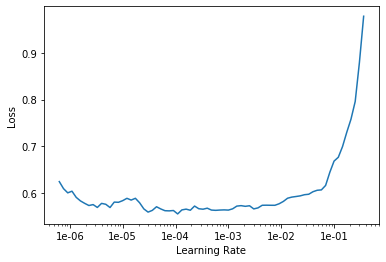

In [22]:
learner.lr_find()
learner.recorder.plot()

In [23]:
learner.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.550666,0.411909,0.807161,00:56
1,0.509577,0.387575,0.812788,00:57


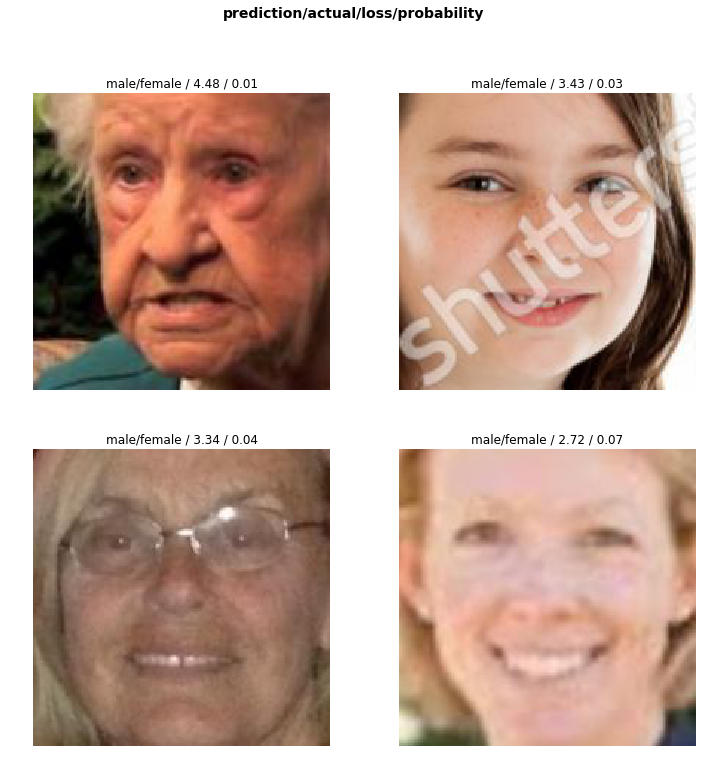

In [36]:
#did they change that API ? It was easier previously
'''
preds,y,losses = learner.get_preds(with_loss=True)
interp = ClassificationInterpretation(learner, preds, y, losses)
'''
interp = learner.interpret()
# interp.top_losses()
interp.plot_top_losses(4)

TypeError: 'NoneType' object is not subscriptable

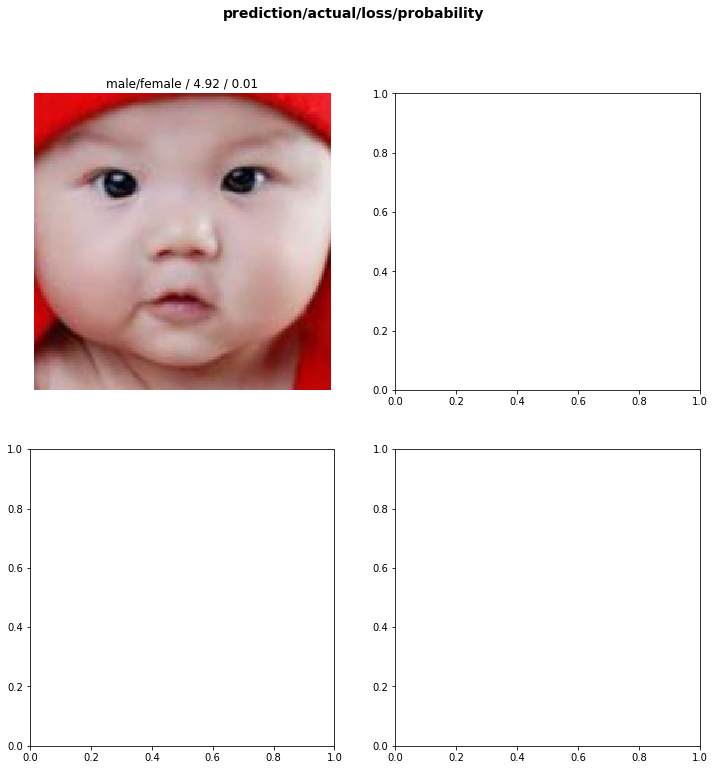

In [27]:
interp.plot_top_losses(4, heatmap=True)